<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/LeNet_Mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: MNIST from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: LeNet based CNN with Fully Connected 
    Optimizer:SGD with 0.01
    Results: 86 to 88 % Accurate
    Total Parameters : 256,080 Parameters
    Total Convolution Layer : 2
```
#### Done by shriarul643@gmail.com

Import all necessary Packages all 


In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import numpy as np  
from matplotlib import  pyplot as plt

Load the mnist data from the Keras

In [2]:
(trainData,trainLabel),(testData,testLabel) = fashion_mnist.load_data()
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


PreProcessing the data.</br>
Reshape to (28,28,1) in order to get a 3-d input to CNN.</br>
Transform Label into Binaries of the format [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] </br>

In [3]:
trainData = img_to_array(trainData).reshape(trainData.shape[0],28,28,1)
testData = img_to_array(testData).reshape(testData.shape[0],28,28,1)

trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [4]:
TargetLabels= ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

Construct a CNN model with :</br>
INPUT => CONV => RELU => FC as the architecture of the CNN

In [5]:
model = Sequential([Conv2D(20,(5,5),padding='same',input_shape=(28,28,1)),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                    Conv2D(50,(5,5),padding='same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(4,4),strides=(4,4)),
                    Flatten(),
                    Dense(500),
                    Activation('relu'),
                    Dense(10,activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 450)               0

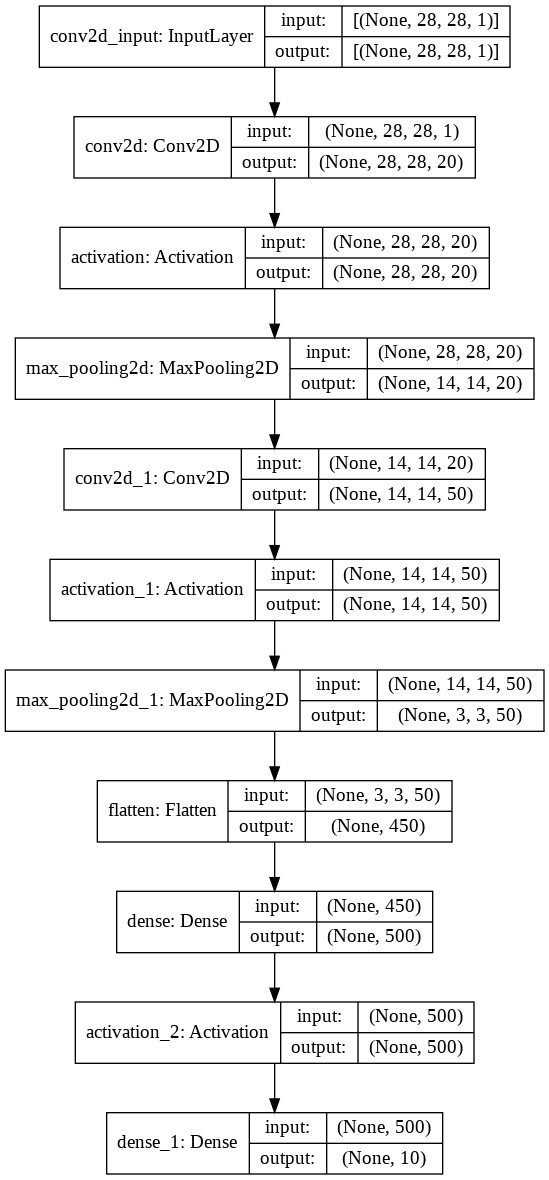

In [7]:
plot_model(model,show_shapes=True)

In [8]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [9]:
H = model.fit(trainData,trainLabel,batch_size=128,epochs=50,validation_data=(testData,testLabel))

Epoch 1/50
469/469 [==============================] - 10s 6ms/step - loss: 1.7611 - accuracy: 0.4472 - val_loss: 0.8188 - val_accuracy: 0.7009
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.7757 - accuracy: 0.7173 - val_loss: 0.6772 - val_accuracy: 0.7552
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.6427 - accuracy: 0.7676 - val_loss: 0.6535 - val_accuracy: 0.7654
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.5889 - accuracy: 0.7879 - val_loss: 0.6405 - val_accuracy: 0.7689
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.5408 - accuracy: 0.8057 - val_loss: 0.5399 - val_accuracy: 0.8067
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.5045 - accuracy: 0.8186 - val_loss: 0.5157 - val_accuracy: 0.8208
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4771 - accuracy: 0.8303 - val_loss: 0.4671 - val_accuracy: 0.8385
Epoch

In [10]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.8974
Accuracy is 89.74%


In [11]:
plt.style.use('ggplot')

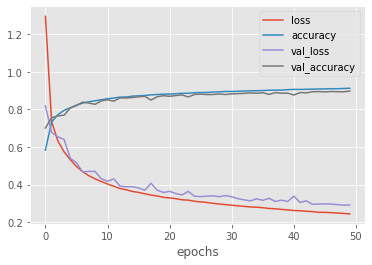

In [12]:
plt.figure()
plt.plot(np.arange(0,50),H.history['loss'],label='loss')
plt.plot(np.arange(0,50),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,50),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,50),H.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [13]:
predicted = model.predict(testData)

In [14]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.87      0.83      1000
           3       0.89      0.90      0.89      1000
           4       0.83      0.83      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.78      0.66      0.71      1000
           7       0.92      0.99      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



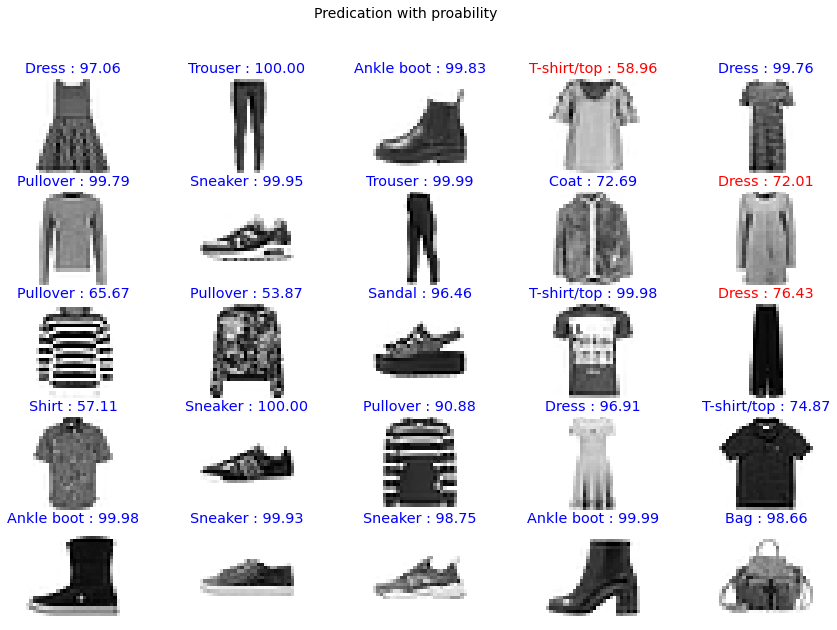

In [15]:
RandomIndex = np.random.randint(0,len(testData),size=(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(28,28),cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = np.argmax(predicted[j])
  actualLabel = np.argmax(testLabel[j])
  if predictedLabel == actualLabel:
    color = 'blue'
  else :
    color = 'red'
  plt.title('{} : {:.2f}'.format(TargetLabels[predictedLabel],predicted[j].max()*100),color=color)
plt.suptitle('Predication with proability',fontsize=14)
plt.show()